In [1]:
import numpy as np
import matplotlib.pyplot as plt

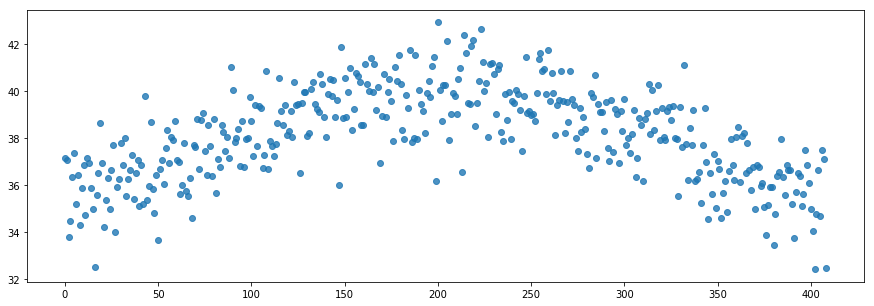

In [2]:
# sampling frequenp.power(2, 12)ncy
Fs = np.power(2, 12)

# frequency of signal in Hz
f = 5

# number of cycles of signal
num_cycle = 0.5

# Amplitude
amp = 5

# Offset
offset = 35

# noise factor
noise = 0.75

# number of sample
num_sample = int(1./f * Fs * num_cycle)

t = np.arange(num_sample)
x = amp * np.sin(2 * np.pi * f * t / Fs)
noise = np.random.randn(num_sample) / 3 * amp * noise + offset
x += noise

plt.figure(figsize=(15, 5))
plt.plot(t, x, 'o', alpha = 0.8)
plt.show()

In [3]:
def smooth_ewma_window(x, window_size):
#     alpha = 2./(window_size+1)
    alpha = 1./window_size
    weighted_x = np.zeros(len(x))
    for i in range(len(x)):
        if i==0:
            weighted_x[i] = x[i]
#             weighted_x[i] = 0
#             weighted_x[i] = (1-alpha) * 0 + alpha*x[i]
        else:
            weighted_x[i] = (1-alpha) * weighted_x[i-1] + alpha*x[i]
    return weighted_x

def smooth_ewma(x, window_size):
    fwd = smooth_ewma_window(x, window_size)
    bwd = smooth_ewma_window(x[::-1], window_size)
    filtered = np.vstack(( fwd, bwd[::-1] ))
    filtered = np.mean(filtered, axis=0)
    return filtered

def smooth_ewma_beta(x, beta, corrected = False):
    weighted_x = np.zeros(len(x))
    for i in range(len(x)):
        if i==0:
#             weighted_x[i] = x[i]
#             weighted_x[i] = 0
            weighted_x[i] = beta * 0 + (1-beta)*x[i]
        else:
            weighted_x[i] = beta * weighted_x[i-1] + (1-beta) * x[i]
            
    if corrected:
        for i in range(len(x)):
            weighted_x[i] = weighted_x[i] / (1 - np.power(beta, i+1))
            
    return weighted_x


def smooth_plt(t, x, ma, window_size = 0, plot_residual = False):
    if plot_residual:
        fig, ax = plt.subplots(2, 1, sharex = True)
        ax[0].plot(t, x, 'o', alpha = 0.8, label = 'Raw')
        ax[0].plot(t, ma, 'r-', linewidth = 5, alpha = 0.8, label = 'Smoothed')
        ax[0].legend()
        ymin, ymax = ax[0].get_ylim()
        if window_size>0:
            ax[1].plot( (x - ma)[:-window_size/2], 'x-', label = 'Residual')
        else:
            ax[1].plot( (x - ma), 'x-', label = 'Residual')
        ax[1].legend()
        fig.set_figheight(10); fig.set_figwidth(16)
    else:
        fig, ax = plt.subplots(1, 1)
        ax.plot(t, x, 'o', alpha = 0.8, label = 'Raw')
        ax.plot(t, ma, 'r-', linewidth = 5, alpha = 0.8, label = 'Smoothed')
        ax.legend()
        fig.set_figheight(5); fig.set_figwidth(16)

    return fig, ax

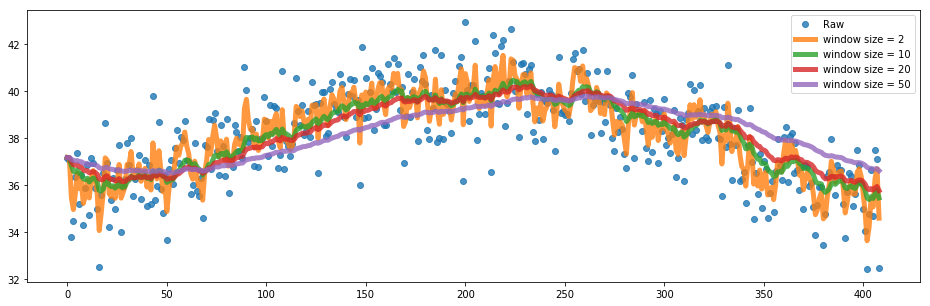

In [4]:
fig, ax = plt.subplots(1, 1)
ax.plot(t, x, 'o', alpha = 0.8, label = 'Raw')
for ws in [2, 10, 20, 50]:
    ma = smooth_ewma_window(x, ws)
    res = x - ma
    ax.plot(t, ma, linewidth = 5, alpha = 0.8, label = 'window size = %d' % ws)
ax.legend()
fig.set_figheight(5); fig.set_figwidth(16)
plt.show()

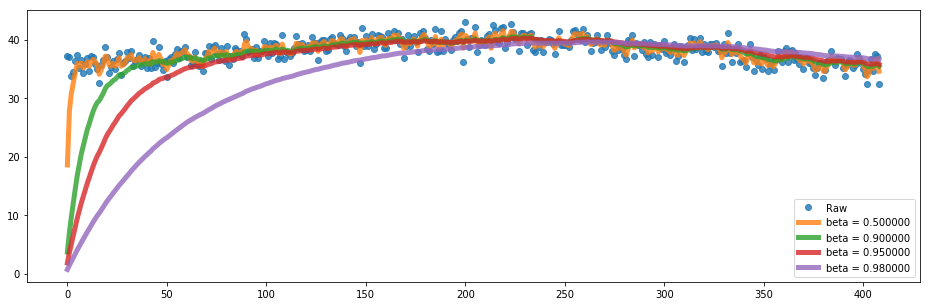

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(t, x, 'o', alpha = 0.8, label = 'Raw')
for beta in [0.5, 0.9, 0.95, 0.98]:
    ma = smooth_ewma_beta(x, beta)
    res = x - ma
    ax.plot(t, ma, linewidth = 5, alpha = 0.8, label = 'beta = %f' % beta)
ax.legend()
fig.set_figheight(5); fig.set_figwidth(16)
plt.show()

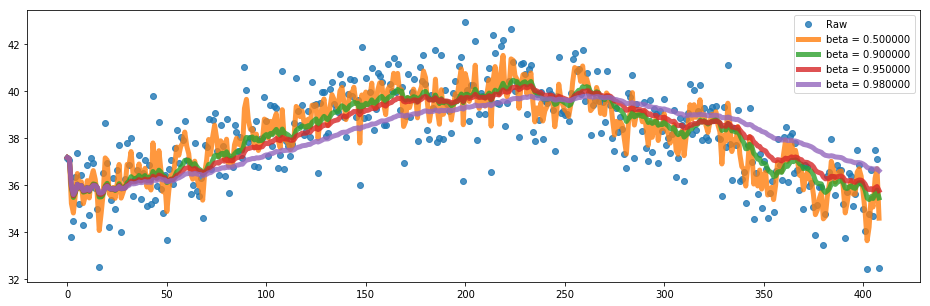

In [6]:
fig, ax = plt.subplots(1, 1)
ax.plot(t, x, 'o', alpha = 0.8, label = 'Raw')
for beta in [0.5, 0.9, 0.95, 0.98]:
    ma = smooth_ewma_beta(x, beta, corrected = True)
    res = x - ma
    ax.plot(t, ma, linewidth = 5, alpha = 0.8, label = 'beta = %f' % beta)
ax.legend()
fig.set_figheight(5); fig.set_figwidth(16)
plt.show()

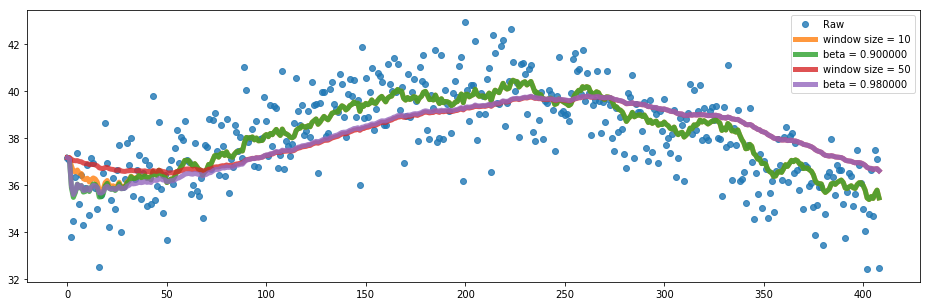

In [7]:
fig, ax = plt.subplots(1, 1)
ax.plot(t, x, 'o', alpha = 0.8, label = 'Raw')
    
for beta in [0.9, 0.98]:
    ws = int(round(1/(1-beta)))
    
    ma_ws = smooth_ewma_window(x, ws)
    ma_beta = smooth_ewma_beta(x, beta, corrected=True)
    
    ax.plot(t, ma_ws, linewidth = 5, alpha = 0.8, label = 'window size = %d' % ws)
    ax.plot(t, ma_beta, linewidth = 5, alpha = 0.8, label = 'beta = %f' % beta)
ax.legend()
fig.set_figheight(5); fig.set_figwidth(16)
plt.show()